In [1]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data_dir = "dataset_tmt/train"
data_dir2 = "dataset_tmt/test"

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,          # Görüntülerin piksel değerlerini [0,1] aralığına getirir
    rotation_range=40,       # Görüntüleri rastgele döndürme
    width_shift_range=0.2,   # Görüntüleri yatayda kaydırma
    height_shift_range=0.2,  # Görüntüleri dikeyde kaydırma
    zoom_range=0.2,          # Görüntüleri rastgele yakınlaştırma
    horizontal_flip=True,    # Görüntüleri yatayda çevirme
    validation_split=0.2     # Eğitim ve doğrulama için veriyi ayırma
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',   
    subset='training',     
    shuffle=True           
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',     # Set as validation data
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir2,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 227 images belonging to 3 classes.
Found 55 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3),padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3),padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3),padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') 
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Since this is multi-class classification
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss',  # İzlenecek metrik
                               patience=3,         # 3 epoch boyunca iyileşme olmazsa durdur
                               restore_best_weights=True)  # En iyi ağırlıkları geri yükle

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=[early_stopping] 
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733153409.783601     123 service.cc:145] XLA service 0x7ec80000c120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733153409.783668     123 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733153409.783675     123 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/8 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.0000e+00 - loss: 1.2264

I0000 00:00:1733153412.899259     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 836ms/step - accuracy: 0.2991 - loss: 1.5636 - val_accuracy: 0.3667 - val_loss: 1.0661
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5105 - loss: 0.9895 - val_accuracy: 0.6000 - val_loss: 0.8550
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5343 - loss: 0.8736 - val_accuracy: 0.7667 - val_loss: 0.5759
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7484 - loss: 0.6071 - val_accuracy: 0.6667 - val_loss: 0.4850
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6804 - loss: 0.6756 - val_accuracy: 0.7667 - val_loss: 0.4115
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7654 - loss: 0.5731 - val_accuracy: 0.8000 - val_loss: 0.4009
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7263 - loss: 0.5201 - val_accuracy: 0.8667 - val_loss: 0.3933
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7781 - loss: 0.4279 - val_accuracy: 0.9000 - val_loss: 0.2959
Epoch 9/1

In [5]:
test_loss, test_accuracy = model.evaluate(test_generator)
train_loss, train_accuracy = model.evaluate(train_generator)
print("Test accuracy:" ,test_accuracy)
print("Train accuracy:" ,train_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9000 - loss: 0.2959
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8749 - loss: 0.3669
Test accuracy: 0.8999999761581421
Train accuracy: 0.8722466826438904


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


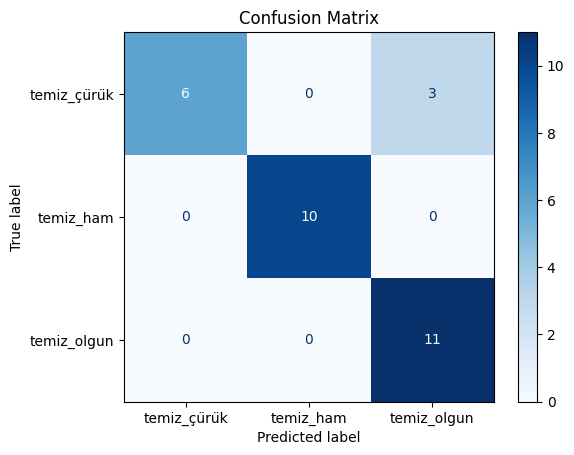

In [6]:
# Sınıf indekslerini al
class_indices = test_generator.class_indices
# Sınıf isimlerine dönüştürme (sınıf ismi ve indekslerinin tersini alarak)
class_names = {v: k for k, v in class_indices.items()}

test_labels = test_generator.classes  # Test setindeki gerçek sınıflar
test_predictions = model.predict(test_generator)
predicted_classes = np.argmax(test_predictions, axis=1)

# Karışıklık matrisi
cm = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_names.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("model_geçici.h5")